In [1]:
%matplotlib inline


# Structural similarity index


When comparing images, the mean squared error (MSE)--while simple to
implement--is not highly indicative of perceived similarity.  Structural
similarity aims to address this shortcoming by taking texture into account
[1]_, [2]_.

The example shows two modifications of the input image, each with the same MSE,
but with very different mean structural similarity indices.

.. [1] Zhou Wang; Bovik, A.C.; ,"Mean squared error: Love it or leave it? A new
       look at Signal Fidelity Measures," Signal Processing Magazine, IEEE,
       vol. 26, no. 1, pp. 98-117, Jan. 2009.

.. [2] Z. Wang, A. C. Bovik, H. R. Sheikh and E. P. Simoncelli, "Image quality
       assessment: From error visibility to structural similarity," IEEE
       Transactions on Image Processing, vol. 13, no. 4, pp. 600-612,
       Apr. 2004.



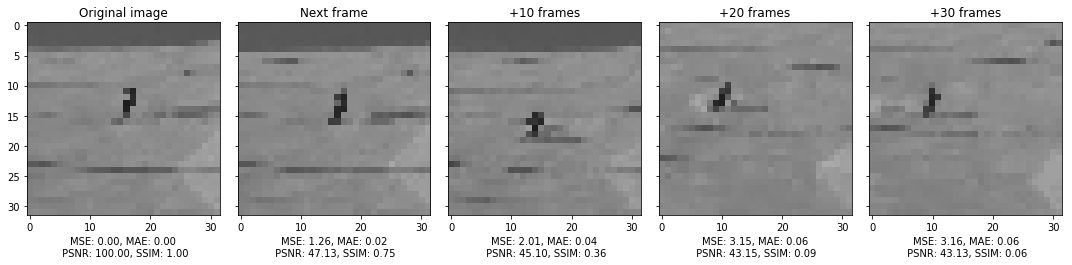

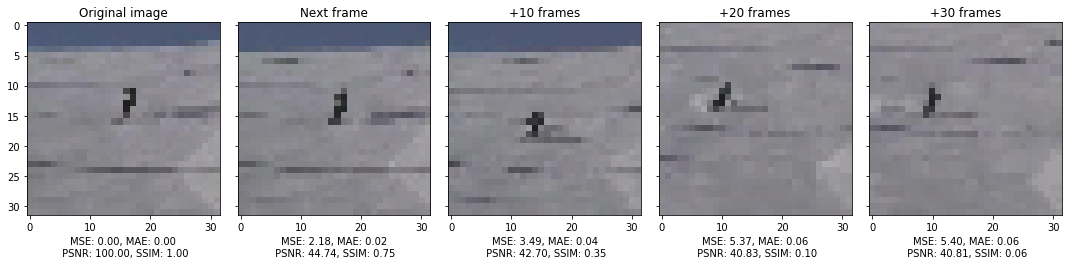

In [8]:
%matplotlib inline
from keras.preprocessing.image import img_to_array, load_img
import sys
sys.path.append('/home/linkermann/Desktop/MA/opticalFlow/opticalFlowGAN')
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, img_as_ubyte
from skimage.measure import compare_ssim as ssim
#from skimage.measure import structural_similarity as ssim
from skimage.color import rgb2gray

def process_image(image, target_size):
    (h,w,c) = target_size
    image = load_img(image, target_size=(h, w))
    img_arr = img_to_array(image).astype(np.uint8) # turn into numpy
    x = img_arr.reshape(h,w,c)
    x = rgb2gray(img_as_float(x))  # turn into grayscale
    return x

def process_image_color(image, target_size):
    (h,w,c) = target_size
    image = load_img(image, target_size=(h, w))
    img_arr = img_to_array(image).astype(np.uint8) # turn into numpy
    x = img_arr.reshape(h,w,c)
    x = img_as_float(x) 
    return x

def mse(x, y):  #l2 loss
    return np.linalg.norm(x - y)  #np.mean( (x - y) ** 2 )

def mae(x, y):  #l1 loss
    return np.mean(np.absolute(x - y))
    
def psnr(x, y):
    mse_0 = mse(x,y)
    if mse_0 == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse_0))

inpath = ["/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0008.jpg", 
          "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0009.jpg",
          "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0019.jpg",
          "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0029.jpg",
          "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0039.jpg"]

img, mses, maes, psnrs, ssims = [], [], [], [], []
img_color, mses2, maes2, psnrs2, ssims2 = [], [], [], [], []
for i in range(0,5):
    img.append(process_image(inpath[i], (32,32,3)))  # read image
    img_color.append(process_image_color(inpath[i], (32,32,3)))  # read image
    #img[i] = img_as_ubyte(img[i])  # to 0-255 for vqi calculation
    mses.append(mse(img[0], img[i]))
    ssims.append(ssim(img[0], img[i], data_range=img[i].max() - img[i].min()))
    psnrs.append(psnr(img[0], img[i]))
    maes.append(mae(img[0], img[i]))
    
    mses2.append(mse(img_color[0], img_color[i]))
    ssims2.append(ssim(img_color[0], img_color[i], multichannel=True, data_range=img_color[i].max() - img_color[i].min()))
    psnrs2.append(psnr(img_color[0], img_color[i]))
    maes2.append(mae(img_color[0], img_color[i]))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()
label = 'MSE: {:.2f}, MAE: {:.2f}\n PSNR: {:.2f}, SSIM: {:.2f}'
titles = ['Original image', 'Next frame', '+10 frames', '+20 frames', '+30 frames']

for i in range(0,5):
    img[i] = img_as_float(img[i]) # to float for displaying
    ax[i].imshow(img[i], cmap=plt.cm.gray, vmin=0, vmax=1)
    ax[i].set_xlabel(label.format(mses[i], maes[i], psnrs[i], ssims[i]))
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()
fig.savefig('/home/linkermann/Desktop/MA/opticalFlow/opticalFlowGAN/data/ssimtest/mse_ssim_test_successive20.png')
plt.close(fig)


fig2, axes2 = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), sharex=True, sharey=True)
ax2 = axes2.ravel()

for i in range(0,5):
    img_color[i] = img_as_float(img_color[i]) # to float for displaying
    ax2[i].imshow(img_color[i], cmap=plt.cm.gray, vmin=0, vmax=1)
    ax2[i].set_xlabel(label.format(mses2[i], maes2[i], psnrs2[i], ssims2[i]))
    ax2[i].set_title(titles[i])

plt.tight_layout()
plt.show()
fig2.savefig('/home/linkermann/Desktop/MA/opticalFlow/opticalFlowGAN/data/ssimtest/mse_ssim_test_successive21.png')
plt.close(fig2)